In [1]:
import utils
import numpy as np
import edf
from matplotlib import pyplot as plt

train_data, trcnt = utils.load_data_onechar('data/ptb.train.txt', False)
valid_data, vacnt = utils.load_data_onechar('data/ptb.valid.txt', False)
test_data, tecnt = utils.load_data_onechar('data/ptb.test.txt', False)

In [4]:
length = list()
for i in train_data:
    length.append(len(i))
max(length)

520

In [19]:
i = 0
data_t = list()
while i < len(train_data):
    hold = list()
    while len(hold) <= 520:
        if i<len(train_data) and len(hold)+len(train_data[i]) <= 520 :
            hold.extend(train_data[i])
        else:
            break
        i+=1
    data_t.append(np.array(hold))


In [25]:
l = list()
for i in data_t:
    l.append(len(i))
print(np.mean(l),np.std(l))

438.930337469 59.4246225831


In [32]:
data_t_fb = list()
long = len(train_data)
i = 0
while i < long/2:
    hold = list()
    hold.extend(train_data[i])
    hold.extend(train_data[long-i-1])
    data_t_fb.append(np.array(hold))
    i += 1

In [33]:
l = list()
for i in data_t_fb:
    l.append(len(i))
print(np.mean(l),np.std(l))

240.541504231 18.2228347447


In [42]:
len(data_t_fb)

21034

In [43]:
len(train_data)

42068

In [44]:
def fold_data(data):
    out = list()
    long = len(data)
    i = 0
    while i < long/2:
        hold = list()
        hold.extend(data[i])
        hold.extend(data[long-i-1])
        out.append(np.array(hold))
        i += 1
    return out

In [45]:
data_v = fold_data(valid_data)

In [46]:
len(data_v)

1685

In [48]:
data_test = fold_data(test_data)

In [49]:
len(data_test)

1881

In [52]:
l = list()
for i in data_v:
    l.append(len(i))
print(np.mean(l),np.std(l))

235.259347181 16.3596751341


In [2]:
loss = [3.92808,2.10561,1.87493,1.72519,1.61944,1.55068,1.49666,1.44756,1.41582,1.40253,1.37039,1.35132,1.33702,1.32275 ,1.31753,1.29980,1.29233,1.31138,1.28235,1.27661,1.26936 ,1.26428,1.25758 ,1.25457 ,1.24430 ,1.23755 ,1.23218,1.22860,1.22606,1.25168]

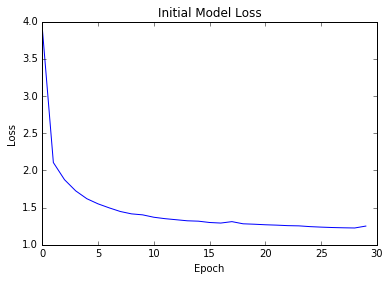

In [10]:
plt.plot(range(30),loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Initial Model Loss')
plt.show()